**1. При выполнении вертикального объединения убедитесь в отсутствии дубликатов данных.**

<ipython-input-2-abe6f82be51b>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'], dayfirst=True, errors='coerce')
<ipython-input-2-abe6f82be51b>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'], dayfirst=True, errors='coerce')
<ipython-input-2-abe6f82be51b>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], dayfirst=True, errors='coerce')
<ipython-

До удаления дубликатов: (85907, 11)
После удаления дубликатов: (85907, 11)


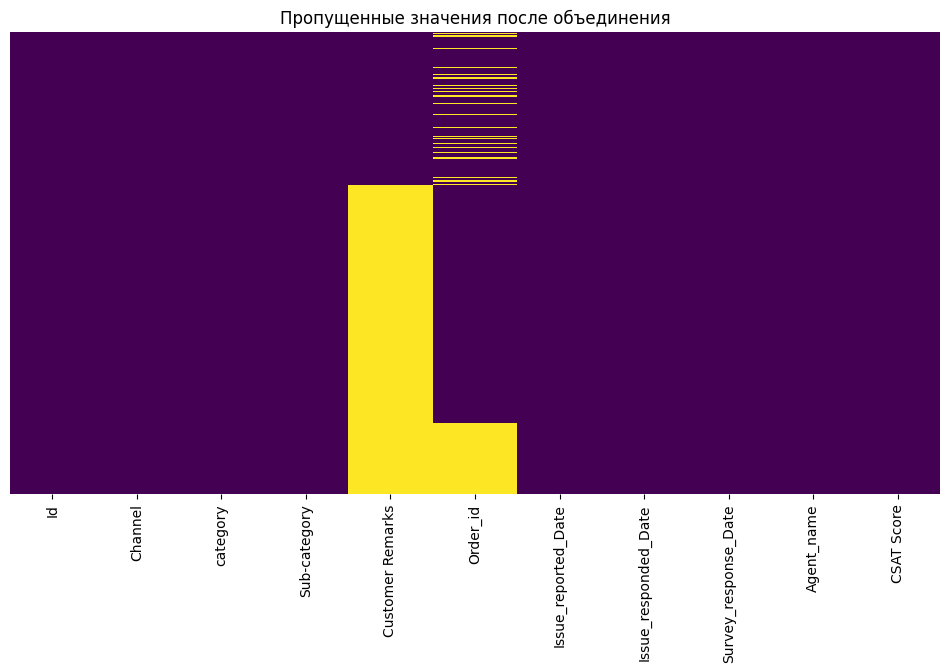

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)
data3 = pd.read_csv('issues4.csv', index_col=0)

# Переименование столбцов data2
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

# Преобразование дат data2 (используем dayfirst=True для dd/mm/yyyy)
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'], dayfirst=True, errors='coerce')
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'], dayfirst=True, errors='coerce')
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], dayfirst=True, errors='coerce')

# Преобразование дат data1
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], dayfirst=True, errors='coerce')
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], dayfirst=True, errors='coerce')
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], dayfirst=True, errors='coerce')

# Обработка data3
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'], errors='coerce')
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'], errors='coerce')
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'], errors='coerce')

# Обработка имени агента
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else np.NaN
)

# Объединение и очистка
data_123 = pd.concat([data1, data2, data3], ignore_index=True)

# Удаление дубликатов
print("До удаления дубликатов:", data_123.shape)
data_123 = data_123.drop_duplicates()
print("После удаления дубликатов:", data_123.shape)

# Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(data_123.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Пропущенные значения после объединения")
plt.show()


**2. При горизонтальной интеграции первой и второй таблицы выведите по каждому столбцу гистограмму распределения или плотность распределения, чтобы убедиться, что признаки выражаются по соотносимым шкалам.**

<ipython-input-3-ee67ddfaf23c>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1[col] = pd.to_datetime(data1[col], errors='coerce', dayfirst=True)
<ipython-input-3-ee67ddfaf23c>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)
<ipython-input-3-ee67ddfaf23c>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)


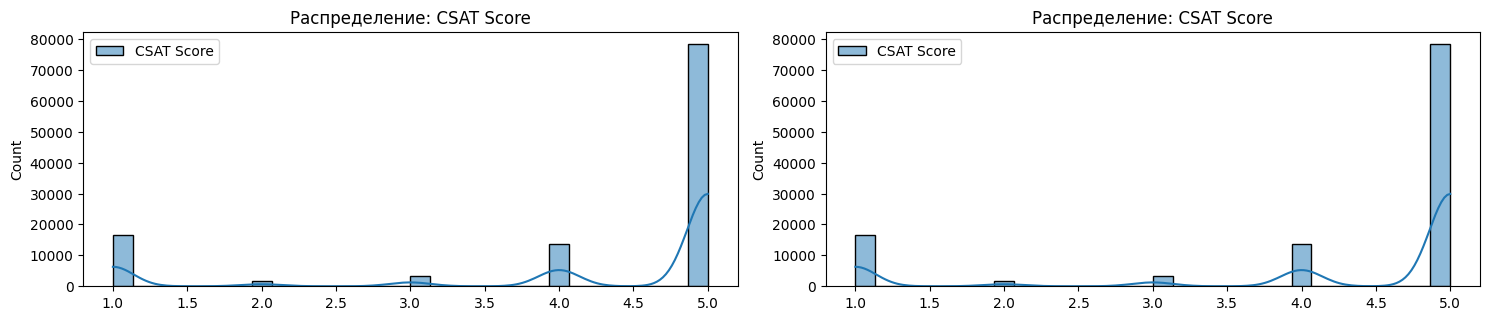

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и предобработка
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)

# Переименование столбцов, если нужно, чтобы избежать конфликтов
data2 = data2.rename(columns={
    'channel_name': 'Channel_2',
    'Reported at': 'Issue_reported_Date_2',
    'Responded at': 'Issue_responded_Date_2',
    'Survey responded at': 'Survey_response_Date_2',
})

# Приведение дат к одному формату
for col in ['Issue_reported_Date', 'Issue_responded_Date', 'Survey_response_Date']:
    data1[col] = pd.to_datetime(data1[col], errors='coerce', dayfirst=True)
for col in ['Issue_reported_Date_2', 'Issue_responded_Date_2', 'Survey_response_Date_2']:
    data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)

# Обрезаем data1 и data2 до общего числа строк, если они разные
min_len = min(len(data1), len(data2))
data1_trimmed = data1.iloc[:min_len].reset_index(drop=True)
data2_trimmed = data2.iloc[:min_len].reset_index(drop=True)

# Горизонтальное объединение
horiz_data = pd.concat([data1_trimmed, data2_trimmed], axis=1)

# Отбор числовых признаков
numeric_cols = horiz_data.select_dtypes(include=['float64', 'int64']).columns

# Построение распределений
plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.histplot(horiz_data[col].dropna(), kde=True, bins=30)
    plt.title(f"Распределение: {col}")
plt.tight_layout()
plt.show()


Этот код помогает убедиться, что числовые признаки из двух таблиц лежат в сопоставимых шкалах.

Если шкалы сильно отличаются (например, один признак от 0 до 1, другой от 0 до 1000), это повод нормализовать их перед обучением моделей.

Аналогично можно построить графики и для категориальных переменных (например, через countplot), если нужно сравнить распределение значений.

**3. При выполнении третьего задания убедитесь более явно, что обильное количество пропущенных значений не является ошибкой объединения. Проведите больше, чем одну точечную проверку.**

<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateu

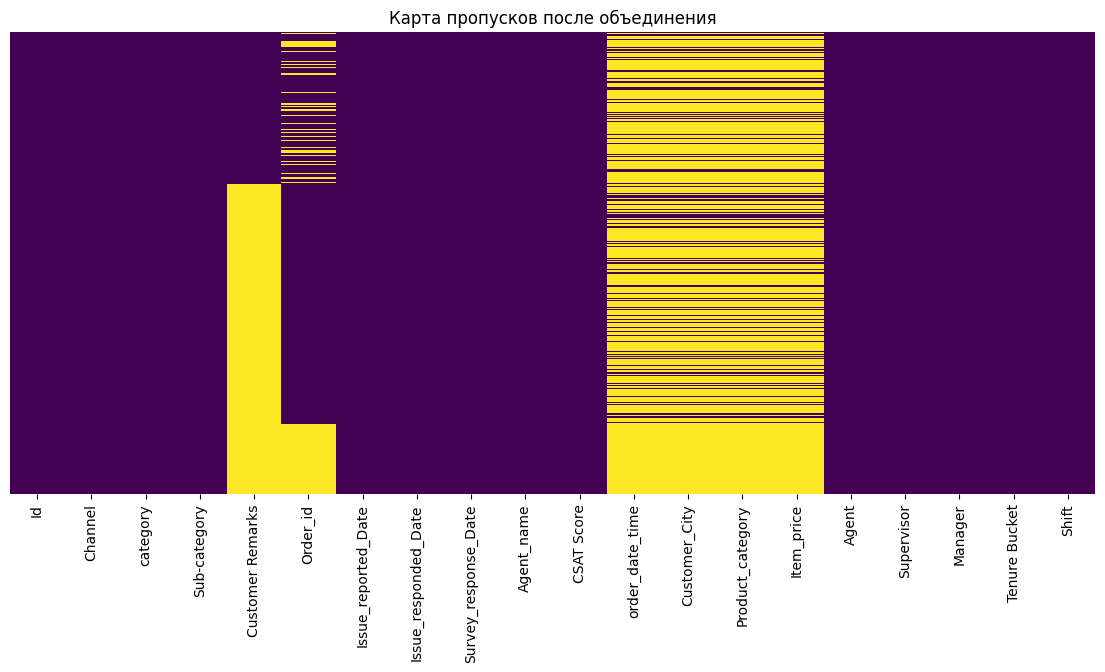

🔎 Пропущенные Order_id: 24863 из 111622 (22.27%)
🔎 Пропущенные Agent: 0 из 111622 (0.00%)
⚠️ Агентов в issues, которых нет в agent_data: 0
Пример:  []
⚠️ Заказов в issues, которых нет в orders: 49710
Пример:  ['1ac26dca-3b34-47f9-895c-6dfffed0c43e', '8de59328-1732-4d20-a001-c30601c1173b', 'f4166efb-8946-47b9-8cc4-332fe6a40964', 'cca8d4d0-ab51-403a-a7f2-15af2c0d0c47', '452fd482-750d-4b64-ac05-aeb578f8816c']


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)
data3 = pd.read_csv('issues4.csv', index_col=0)
orders_data = pd.read_csv('orders.csv', index_col=0)
agent_data = pd.read_csv("agents.csv", index_col=0)

# Переименование и приведение типов
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
orders_data = orders_data.rename(columns={'Id': 'Order_id'})

# Приведение дат
for df in [data1, data2, data3]:
    for col in ['Issue_reported_Date', 'Issue_responded_Date', 'Survey_response_Date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# Приведение имен агентов
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.nan
)
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.nan
)

# Объединение data1 + data2 + data3
data_12 = pd.concat([data1, data2])
data_123 = pd.concat([data_12, data3])

# Объединение с заказами
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')

# Объединение с агентами
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name')

# Проверка пропусков
plt.figure(figsize=(14, 6))
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Карта пропусков после объединения")
plt.show()

# ==== Подробная проверка: не ошибка ли это? ====

# 1. Доля строк без заказов
missing_orders = data_with_agents['Order_id'].isna().sum()
print(f"🔎 Пропущенные Order_id: {missing_orders} из {len(data_with_agents)} ({missing_orders / len(data_with_agents):.2%})")

# 2. Доля строк без данных об агенте
missing_agents = data_with_agents['Agent'].isna().sum()
print(f"🔎 Пропущенные Agent: {missing_agents} из {len(data_with_agents)} ({missing_agents / len(data_with_agents):.2%})")

# 3. Есть ли Agent_name, которых нет в agent_data?
agent_names_in_issues = set(data_123['Agent_name'].dropna())
agent_names_in_agents = set(agent_data['Agent_name'].dropna())
unknown_agents = agent_names_in_issues - agent_names_in_agents
print(f"⚠️ Агентов в issues, которых нет в agent_data: {len(unknown_agents)}")
print("Пример: ", list(unknown_agents)[:5])

# 4. Есть ли Order_id, которых нет в orders_data?
order_ids_in_issues = set(data_123['Order_id'].dropna())
order_ids_in_orders = set(orders_data['Order_id'].dropna())
unknown_orders = order_ids_in_issues - order_ids_in_orders
print(f"⚠️ Заказов в issues, которых нет в orders: {len(unknown_orders)}")
print("Пример: ", list(unknown_orders)[:5])


**4. При выполнении третьего задания попробуйте использовать разные виды соединений. Как это отражается на структуре датасета?**

In [5]:
# Варианты соединений
data_inner = data_123.merge(agent_data, how='inner', on='Agent_name')
data_left = data_123.merge(agent_data, how='left', on='Agent_name')
data_outer = data_123.merge(agent_data, how='outer', on='Agent_name')

# Сравнение размеров
print("🔍 Inner join:", data_inner.shape)
print("🔍 Left join: ", data_left.shape)
print("🔍 Outer join:", data_outer.shape)

# Сравнение пропусков
def count_nans(df, label):
    print(f"{label} — Пропущенные значения по Agent:")
    print(df['Agent'].isna().sum(), "из", len(df), f"({df['Agent'].isna().mean():.2%})")

count_nans(data_inner, "Inner join")
count_nans(data_left,  "Left join")
count_nans(data_outer, "Outer join")


🔍 Inner join: (111622, 16)
🔍 Left join:  (111622, 16)
🔍 Outer join: (111622, 16)
Inner join — Пропущенные значения по Agent:
0 из 111622 (0.00%)
Left join — Пропущенные значения по Agent:
0 из 111622 (0.00%)
Outer join — Пропущенные значения по Agent:
0 из 111622 (0.00%)


**5. Изучите документацию pandas в части описания методов merge и join.**

pd.merge()

Метод merge() используется для гибкого объединения двух DataFrame по заданным ключам (аналог SQL JOIN).

DataFrame.join()

Метод join() — это удобная обёртка вокруг merge() для объединения по индексам или по одному столбцу.

**6. Познакомьтесь с форматом представления дат strftime.**

Формат strftime (от string format time) используется в Python для форматирования и разбора дат и времени в виде строк.

Он позволяет задать шаблон, по которому дата и/или время будет сформирована в строку или распознана из строки.




%Y	Год (4 цифры)	2023

%y	Год (2 цифры)	23

%m	Месяц (01-12)	04